In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('/Users/raymondli/Desktop/PredictorLSretWide.csv')
df = df.iloc[600:]
date = df['date']
df = df.drop(columns='date')
df = df.interpolate(limit=10)


df_cum = pd.read_csv('factor_timing2.csv')
df_bsadf = pd.read_csv('factor_timing2_bsadf.csv')
df_bsadf = df_bsadf.drop(columns='Unnamed: 0')
df_cum = df_cum.drop(columns='Unnamed: 0')
df_bsadf = df_bsadf.fillna(-5)
df_cv = pd.read_csv('factor_timing2_cv.csv')
df_cv = df_cv.drop(columns='Unnamed: 0')

df_indicator = pd.DataFrame()
CV95 = df_cv.iloc[:,1]
for column in df_bsadf.columns:
    x = df_bsadf[column]
    df_indicator = pd.concat([df_indicator,(x>CV95)],axis=1)


df_ret = df.iloc[48:,:]
df_ret = df_ret.fillna(0)

df_signal = pd.DataFrame(0,index=np.arange(516),columns=df_ret.columns)
N,M = df_ret.shape
for j in range(M):
    for i in range(N):
        if df_indicator.iloc[i,j] and df_ret.iloc[i,j]>0:
            df_signal.iloc[i,j]=1


df_signal

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
512,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
513,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
514,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
x=(df_signal.shift(-1)-df_signal).dropna()
x

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
x=(df_signal.shift(-1)-df_signal).dropna()
W = [0 for _ in range(N)]
W[0] = 100
ret_adj = np.zeros(N-1)
for i in range(N-1):
    j=4
    signal = df_signal.iloc[i,j]
    
    ret = df_ret.iloc[i+1,j]
    if signal==1:
        if x.iloc[i,j]==1:
            ret_adj[i] = 1.5*ret/100-0.005
            W[i+1]=W[i]*(1+ret_adj[i])
        else:
            ret_adj[i]=1.5*ret/100
            W[i+1]=W[i]*(1+ret_adj[i])
    else:
        if x.iloc[i,j]==-1:
            ret_adj[i]=ret/100-0.005
            W[i+1]=W[i]*(1+ret_adj[i])
        else:
            ret_adj[i]=ret/100
            W[i+1]=W[i]*(1+ret_adj[i])

W


[100,
 99.870383396,
 101.34347699103078,
 96.44313990229524,
 94.23151539968177,
 93.1008358253395,
 86.21379428969408,
 82.49391432278509,
 79.79520894419005,
 73.7086686784109,
 62.87972303053903,
 63.9751722198728,
 72.73305546172028,
 77.3369092889975,
 76.1236254113539,
 74.29113530436499,
 71.22089810572645,
 79.83572557186874,
 81.66155564798048,
 87.27264952566762,
 88.86572212858397,
 82.53051853413132,
 84.18723742260119,
 84.89639901836364,
 88.58458904946923,
 95.20694672517357,
 97.68279958838144,
 91.78869496025432,
 93.66371320777836,
 95.16484771646863,
 98.92889224357252,
 98.13976569275103,
 102.11493922598841,
 97.09086134640799,
 98.93680671688121,
 101.20514176851724,
 104.27006420047182,
 107.2143629238459,
 115.81664521518309,
 118.7012089911959,
 122.65989644648702,
 129.58290808922663,
 139.550227698132,
 146.46078345036298,
 150.1319493919901,
 170.72907100213664,
 165.87036460851772,
 176.81531943621377,
 196.7780805774456,
 199.24100037162265,
 215.54866986

In [32]:
j=4
W0=np.array(df_cum.iloc[48:,j]*100)

W0

array([  176.30616322,   176.07764116,   178.67479596,   170.03519966,
         166.13596935,   164.14251157,   152.00023288,   145.44185524,
         140.68387133,   129.95292571,   110.86082712,   112.79217156,
         128.23285948,   136.34973752,   134.21064327,   130.97985027,
         125.56683286,   140.75530464,   143.97435559,   153.86705992,
         156.67574511,   145.50639072,   148.42728822,   149.67758383,
         156.18009016,   167.85571489,   172.22079608,   161.82912636,
         165.13489909,   167.78149175,   174.41773424,   173.02645549,
         180.03493143,   171.17717248,   174.43168794,   178.43090244,
         183.83454958,   189.0255297 ,   204.19188355,   209.27754727,
         216.25695724,   228.46265345,   246.03565223,   258.21938793,
         264.69187975,   288.90120964,   283.42006479,   302.12153574,
         324.86157159,   327.57226644,   345.44656691,   353.49934738,
         363.33386207,   358.58389443,   370.06798973,   358.00062249,
      

In [60]:
ret = df_ret.iloc[1:,j]/100
delta_r = (ret_adj-ret).mean()
delta_r


0.003986224615019417

In [117]:
sp0 = ret.mean()/np.var(ret)
sp1 = np.array(ret_adj).mean()/np.var(ret_adj)
delta_sp = sp1-sp0
delta_sp
df_signal.iloc[:,-1].sum()

2

In [166]:
(df_signal-df_signal.shift(1)).fillna(0)

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import statsmodels.api as sm
delta_r_lst = []
delta_sp_lst = []
sp0_lst = []
sp1_lst = []
MDD0_lst = []
MDD1_lst = []
alpha_lst = []
t_lst = []
x=(df_signal-df_signal.shift(1)).fillna(0)
for j in range(M):
    W = [0 for _ in range(N)]
    W[0] = 100
    ret_adj = [0 for _ in range(N-1)]
    for i in range(N-1):
        signal = df_signal.iloc[i,j]
    
        ret = df_ret.iloc[i+1,j]
        if signal==1.0:
            if x.iloc[i,j]==1.0:
                ret_adj[i] = 1*ret/100-0.001
                W[i+1]=W[i]*(1+ret_adj[i])
            else:
                ret_adj[i]= 1*ret/100
                W[i+1]=W[i]*(1+ret_adj[i])
        else:
            if x.iloc[i,j]==-1.0:
                ret_adj[i]=0*ret/100-0.001
                W[i+1]=W[i]*(1+ret_adj[i])
            else:
                ret_adj[i]=0*ret/100
                W[i+1]=W[i]*(1+ret_adj[i])
    
    ret = df_ret.iloc[1:,j]/100
    ab_ret = ret_adj - ret
    delta_r = (ret_adj-ret).mean()
    delta_r_lst.append(delta_r)
    MDD0 = np.array(ret).min()
    MDD1 = np.array(ret_adj).min()
    MDD0_lst.append(MDD0)
    MDD1_lst.append(MDD1)
    sp0 = np.sqrt(12)*ret.mean()/np.std(ret)
    sp1 = np.sqrt(12)*np.array(ret_adj).mean()/np.std(ret_adj)
    sp0_lst.append(sp0)
    sp1_lst.append(sp1)
    delta_sp = (sp1-sp0)
    delta_sp_lst.append(delta_sp)
    X = np.ones(515)
    results = sm.OLS(ab_ret,X).fit()
    alpha = results.t_test('const=0').summary_frame().loc['c0','coef']
    t = results.t_test('const=0').summary_frame().loc['c0','t']
    alpha_lst.append(alpha)
    t_lst.append(t)




/var/folders/c_/5d97ws9141b55mq_zz75hlk80000gn/T/ipykernel_2499/4096276094.py:43: RuntimeWarning: invalid value encountered in scalar divide
  sp1 = np.sqrt(12)*np.array(ret_adj).mean()/np.std(ret_adj)
/var/folders/c_/5d97ws9141b55mq_zz75hlk80000gn/T/ipykernel_2499/4096276094.py:43: RuntimeWarning: invalid value encountered in scalar divide
  sp1 = np.sqrt(12)*np.array(ret_adj).mean()/np.std(ret_adj)
/var/folders/c_/5d97ws9141b55mq_zz75hlk80000gn/T/ipykernel_2499/4096276094.py:43: RuntimeWarning: invalid value encountered in scalar divide
  sp1 = np.sqrt(12)*np.array(ret_adj).mean()/np.std(ret_adj)


In [6]:
delta_r = pd.Series(delta_r_lst)
sp0 = pd.Series(sp0_lst)
sp1 = pd.Series(sp1_lst)
delta_sp = pd.Series(delta_sp_lst)
MDD0 = pd.Series(MDD0_lst)
MDD1 = pd.Series(MDD1_lst)
alpha = pd.Series(alpha_lst)
t = pd.Series(t_lst)
df = pd.concat([delta_r,sp0,sp1,delta_sp,MDD0,MDD1,alpha,t],axis=1)
df.columns = ['delta_r','sp0','sp1','delta_sp','MDD0','MDD1','alpha','t']
df

,delta_r,sp0,sp1,delta_sp,MDD0,MDD1,alpha,t
0,-0.004265,0.442328,0.454607,0.012279,-0.281017,-0.092393,-0.004265,-2.088276
1,-0.001642,0.262885,0.156627,-0.106258,-0.101493,-0.073255,-0.001642,-1.480043
2,-0.000747,0.172294,0.266298,0.094004,-0.052923,-0.028260,-0.000747,-0.787025
3,-0.002310,0.580592,0.276239,-0.304353,-0.064632,-0.064032,-0.002310,-3.321757
4,-0.005865,0.968842,0.858503,-0.110339,-0.173932,-0.169053,-0.005865,-3.470537
...,...,...,...,...,...,...,...,...
207,-0.003179,0.262580,0.239719,-0.022861,-0.458816,-0.207963,-0.003179,-1.202724
208,-0.001422,0.352718,0.377322,0.024604,-0.120937,-0.100940,-0.001422,-1.034813
209,-0.003720,0.235809,-0.157307,-0.393115,-0.272699,-0.111465,-0.003720,-1.710404
210,-0.004674,0.335069,-0.086585,-0.421653,-0.275111,-0.136133,-0.004674,-2.359942


In [229]:
acronym = pd.Series(df_signal.columns)
df = pd.concat([acronym,df],axis=1)
df.columns = ['acronym','delta_r','sp0','sp1','delta_sp','MDD0','MDD1','alpha','t']


,acronym,delta_r,sp0,sp1,delta_sp,MDD0,MDD1,alpha,t
0,AM,0.001913,0.442328,0.514920,0.072592,-0.281017,-0.281017,0.001913,2.975273
1,AOP,0.000359,0.262885,0.274981,0.012097,-0.101493,-0.146511,0.000359,1.025079
2,AbnormalAccruals,0.000346,0.172294,0.213853,0.041559,-0.052923,-0.056519,0.000346,1.742847
3,Accruals,0.000664,0.580592,0.552696,-0.027896,-0.064632,-0.127063,0.000664,1.807905
4,AccrualsBM,0.007638,0.968842,1.026124,0.057282,-0.173932,-0.337106,0.007638,5.618660
...,...,...,...,...,...,...,...,...,...
207,std_turn,0.001745,0.262580,0.295303,0.032723,-0.458816,-0.459816,0.001745,1.568890
208,tang,0.002520,0.352718,0.402199,0.049481,-0.120937,-0.200880,0.002520,2.469466
209,zerotrade,-0.000326,0.235809,0.206711,-0.029098,-0.272699,-0.272699,-0.000326,-1.029529
210,zerotradeAlt1,-0.000234,0.335069,0.299102,-0.035967,-0.275111,-0.276111,-0.000234,-0.566673


In [234]:
df.mean()

/var/folders/c_/5d97ws9141b55mq_zz75hlk80000gn/T/ipykernel_1546/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


delta_r     0.001776
sp0         0.517122
sp1         0.513817
delta_sp   -0.003305
MDD0       -0.184448
MDD1       -0.260077
alpha       0.001776
t           2.167392
dtype: float64

In [236]:
(1+df['delta_r'].mean())**12-1

0.02152341851218531

In [205]:
np.where(np.array(delta_sp_lst)>0)[0].shape
# (1+np.array(delta_r_lst).mean())**12-1
sp0*np.sqrt(12)

0.1720153193803132

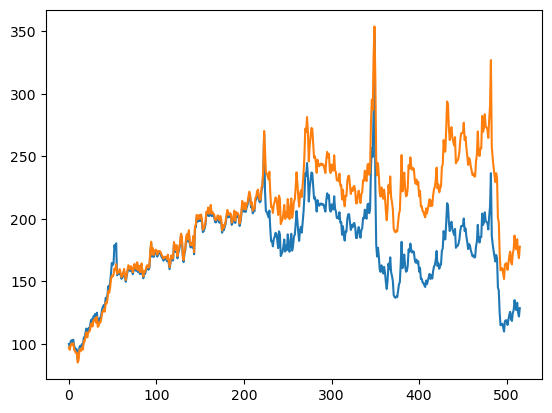

In [196]:
plt.plot(np.arange(516),W)
plt.plot(np.arange(516),W0)